In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

In [2]:
df_ori = pd.read_csv('./data/wine.csv' , header= None)
df = df_ori
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [3]:
X = df.iloc[:, :12]
y = df.iloc[:, 12]
X.shape

(6497, 12)

In [4]:
6497*0.8

5197.6

In [5]:
6497*0.2

1299.4

In [6]:
X = df.iloc[:, :12]
y = df.iloc[:, 12]

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, shuffle=True)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [26]:
# modelpath = "./model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
modelpath = "./model/all/{epoch:02d}-{val_accuracy:.4f}.keras"

In [27]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [28]:
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [29]:
model = Sequential()
model.add( Dense(36, 
                input_dim=12,
                activation='relu'))
model.add( Dense(12, activation='relu'))
model.add( Dense(8, activation='relu'))
model.add( Dense(1, activation='sigmoid'))
model.compile( 
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history = model.fit( X_train, y_train,epochs=50,
                    batch_size=500, 
                    validation_split=0.25, callbacks=[checkpointer])
# validation_split 확인 필요.


Epoch 1/50
1/8 [==>...........................] - ETA: 3s - loss: 20.3183 - accuracy: 0.2700
Epoch 1: saving model to ./model/all\01-0.2362.keras
8/8 [==============================] - 1s 24ms/step - loss: 17.3494 - accuracy: 0.2497 - val_loss: 13.2043 - val_accuracy: 0.2362
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 13.2056 - accuracy: 0.2380
Epoch 2: saving model to ./model/all\02-0.2354.keras
8/8 [==============================] - 0s 8ms/step - loss: 10.0204 - accuracy: 0.2497 - val_loss: 6.8587 - val_accuracy: 0.2354
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 6.8819 - accuracy: 0.2340
Epoch 3: saving model to ./model/all\03-0.2046.keras
8/8 [==============================] - 0s 8ms/step - loss: 5.2894 - accuracy: 0.2422 - val_loss: 3.6398 - val_accuracy: 0.2046
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 3.4860 - accuracy: 0.2460
Epoch 4: saving model to ./model/all\04-0.1554.keras
8/8 [============================

In [ ]:
history.history

In [ ]:
history.history['val_accuracy']

In [ ]:
len(history.history['val_accuracy'])

In [ ]:
history['val_accuracy']

In [ ]:
5197*0.75, 5197*0.25

In [ ]:
X_test.shape

In [ ]:
1300 / 500 # batch_size : 500

In [ ]:
model.evaluate(X_test, y_test)

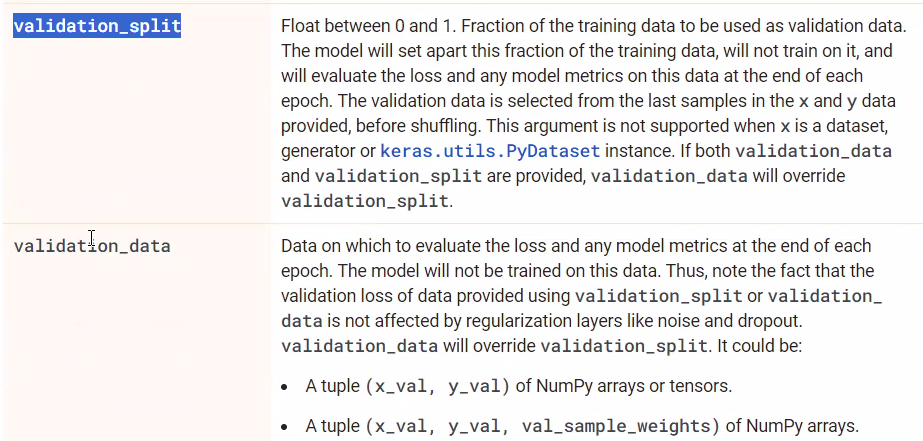

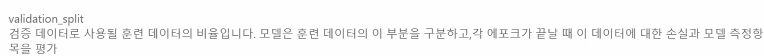

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold( n_splits=5 ,
       shuffle=True,
       random_state=42)

In [ ]:
# indices : 인덱스의 복수형이다.
kfold.split(X)


In [ ]:
# for train_index, test_index in kfold.split(X) :
#     print(train_index, test_index)
#     print("size : ", len(train_index), len(test_index))
#     print("="*60)

In [ ]:
X.shape 

In [ ]:
y.shape

In [ ]:
y

In [ ]:
accuracy_score = []

In [ ]:
def model_fn():
    model = Sequential()
    model.add( Dense(24, 
                input_dim=60, activation='relu'))
    model.add( Dense(10, activation='relu'))
    model.add( Dense(1, activation='sigmoid'))   
    return model 

In [ ]:
#help(kfold.split)

In [ ]:
# [테스트 데이터로 평가한 모델의 정확도]
# 개념 파악을 위해, for 사용
# 보통 사용 X
for train_index, test_index in kfold.split(X) :
     
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index ], y.iloc[test_index ]
    model = model_fn()
    
    model.compile( 
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    ) 
    # verbose 1 : fit 실행 후 자세한 출력이 나오게 한다.
    # 0은 출력 안하게
    history = model.fit( X_test, y_test,
                        epochs=200, batch_size=10, verbose=0)
    accuracy = model.evaluate(X_test, y_test)
    print("*** Test accuracy : " , accuracy[1])
    accuracy_score.append(accuracy)

In [ ]:
accuracy_score

In [ ]:
type(accuracy_score)

In [ ]:
[i[1] for i in accuracy_score]

In [ ]:
import numpy as np
a_s = [i[1] for i in accuracy_score]
np.average(a_s)